# Clustering Methods Exercises

## Introduction

We will be using the wine quality data set for these exercises. This data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data`.

We will be using the chemical properties (i.e. everything but quality and color) to cluster the wine. Though this is unsupervised learning, it can be fun to see how our clustering results map onto color and quality.

In [2]:
from __future__ import print_function
import os
data_path = ['data']

## Question 1

* Import the data and examine the features. 
* Note which are continuous, categorical, and boolean. 
* How many entries are there for the two colors and range of qualities? 
* Make a histogram plot of the quality for each of the wine colors.

In [62]:
import pandas as pd

# Import the data
filepath = os.sep.join(data_path + ['Wine_Quality_Data.csv'])
data = pd.read_csv(filepath)

data.head(4).T

,0,1,2,3
fixed_acidity,7.4,7.8,7.8,11.2
volatile_acidity,0.7,0.88,0.76,0.28
citric_acid,0,0,0.04,0.56
residual_sugar,1.9,2.6,2.3,1.9
chlorides,0.076,0.098,0.092,0.075
free_sulfur_dioxide,11,25,15,17
total_sulfur_dioxide,34,67,54,60
density,0.9978,0.9968,0.997,0.998
pH,3.51,3.2,3.26,3.16
sulphates,0.56,0.68,0.65,0.58


In [63]:
data.shape

(6497, 13)

The data types for each entry. The implementation of K-means in Scikit-learn is designed only to work with continuous data (even though it is sometimes used with categorical or boolean types). Fortunately, all the columns we will be using (everything except quality and color) are continuous.

In [64]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

The number of entries for each wine color.

In [65]:
#Entries for the two colors and range of qualities

#Color 
print('Colors:', data.color.unique())
print('Number of Colors:', data.color.nunique())

Colors: ['red' 'white']
Number of Colors: 2


The distribution of quality values.

In [66]:
#Distribution of quality values

#Qualities
print('Qualities:', data.quality.unique())
data.quality.value_counts().sort_index()

Qualities: [5 6 7 4 8 3 9]


3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

Now for the histogram.

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

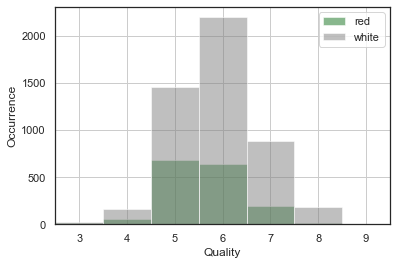

In [68]:
# seaborn styles
sns.set_context('notebook')
sns.set_style('white')
sns.set_palette('dark')

# custom colors
red = sns.color_palette()[2]
white = 'gray'

# set bins for histogram
bins = np.array([3,4,5,6,7,8,9])

# plot histogram of quality counts for red and white wines
ax = plt.axes()
for color, plot_color in zip(['red', 'white'], [red, white]):
    q_data = data.loc[data.color==color, 'quality']
    q_data.hist(bins=bins,
                alpha=0.5, ax=ax,
                color=plot_color, label=color)

ax.legend()
ax.set(xlabel='Quality', ylabel='Occurrence');

# force tick labels to be in middle of region
ax.set_xlim(3,10)
ax.set_xticks(bins+0.5)
ax.set_xticklabels(bins);



## Question 2

* Example the correlation and skew of the relevant variables--everything except color and quality.
* Perform any appropriate feature transformations and/or scaling.
* Examine the pairwise distribution of the variables with pairplots to verify scaling and normalization efforts.


In [82]:
float_cols = [x for x in data.columns if x not in ['color', 'quality']]

# The correlation matrix
data_corr = data[float_cols].corr()

# Strip out the diagonal values for the next step
data_corr = data_corr.mask(np.tril(np.ones(data_corr.shape)).astype(np.bool))
data_corr = data_corr.stack().reset_index()
data_corr[0] = abs(data_corr[0])


#Ordering from max to min correlation
data_corr = data_corr.sort_values(by=0, ascending=False)

In [83]:
# Pairwise maximal correlations
data_corr.head(5)

,level_0,level_1,0
40,free_sulfur_dioxide,total_sulfur_dioxide,0.731111
51,density,alcohol,0.686745
30,residual_sugar,density,0.502814
29,residual_sugar,total_sulfur_dioxide,0.481509
6,fixed_acidity,density,0.466100


And an examination of the skew values in anticipation of transformations.

In [71]:
data_skew = data[float_cols].skew().sort_values(ascending=False)

#Look for all columns with skew higher than 0.75
data_skew = data_skew.loc[data_skew > 0.75]
data_skew

chlorides              5.399828
sulphates              1.797270
fixed_acidity          1.723290
volatile_acidity       1.495097
residual_sugar         1.435404
free_sulfur_dioxide    1.220066
dtype: float64

In [73]:
# Perform log transform on skewed columns
for col in data_skew.index.to_list():
    data[col] = np.log1p(data[col])

data.skew()
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,1.128700,0.247409,0.318633,0.930135,0.052219,1.437725,115.744574,0.994697,3.218501,0.349886,10.491801,5.818378
std,0.045992,0.085772,0.145318,0.257315,0.027602,0.168041,56.521855,0.002999,0.160787,0.062735,1.192712,0.873255
min,0.943367,0.074143,0.000000,0.385265,0.008920,0.526589,6.000000,0.987110,2.720000,0.181363,8.000000,3.000000
25%,1.099106,0.188150,0.250000,0.707848,0.036617,1.358505,77.000000,0.992340,3.110000,0.305773,9.500000,5.000000
50%,1.124748,0.226850,0.310000,0.869742,0.044905,1.481877,118.000000,0.994890,3.210000,0.345085,10.300000,6.000000
75%,1.151623,0.290033,0.390000,1.165733,0.061071,1.555545,156.000000,0.996990,3.320000,0.385265,11.300000,6.000000
max,1.342163,0.666695,1.660000,1.648986,0.389915,1.897602,440.000000,1.038980,4.010000,0.741276,14.900000,9.000000


Perform feature scaling.

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data[float_cols] = scaler.fit_transform(data[float_cols])

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6497.000000
mean,5.949442e-16,1.749836e-16,2.187295e-17,-2.624754e-16,-1.749836e-16,-1.749836e-16,-6.999344e-17,-3.552167e-15,2.729744e-15,5.949442e-16,9.974065e-16,5.818378
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,0.873255
min,-4.029976e+00,-2.020226e+00,-2.192833e+00,-2.117690e+00,-1.568851e+00,-5.422510e+00,-1.941780e+00,-2.530192e+00,-3.100615e+00,-2.686491e+00,-2.089350e+00,3.000000
25%,-6.435186e-01,-6.909422e-01,-4.723335e-01,-8.639394e-01,-5.653088e-01,-4.714718e-01,-6.855323e-01,-7.859527e-01,-6.748622e-01,-7.032259e-01,-8.316152e-01,5.000000
50%,-8.592865e-02,-2.397021e-01,-5.941375e-02,-2.347257e-01,-2.650028e-01,2.627601e-01,3.990667e-02,6.448888e-02,-5.287424e-02,-7.654557e-02,-1.608231e-01,6.000000
75%,4.984515e-01,4.969943e-01,4.911459e-01,9.156729e-01,3.207308e-01,7.011901e-01,7.122647e-01,7.648525e-01,6.313125e-01,5.639807e-01,6.776670e-01,6.000000
max,4.641657e+00,4.888763e+00,9.231281e+00,2.793880e+00,1.223556e+01,2.736896e+00,5.737257e+00,1.476879e+01,4.923029e+00,6.239298e+00,3.696231e+00,9.000000


Finally, the pairplot of the transformed and scaled features.

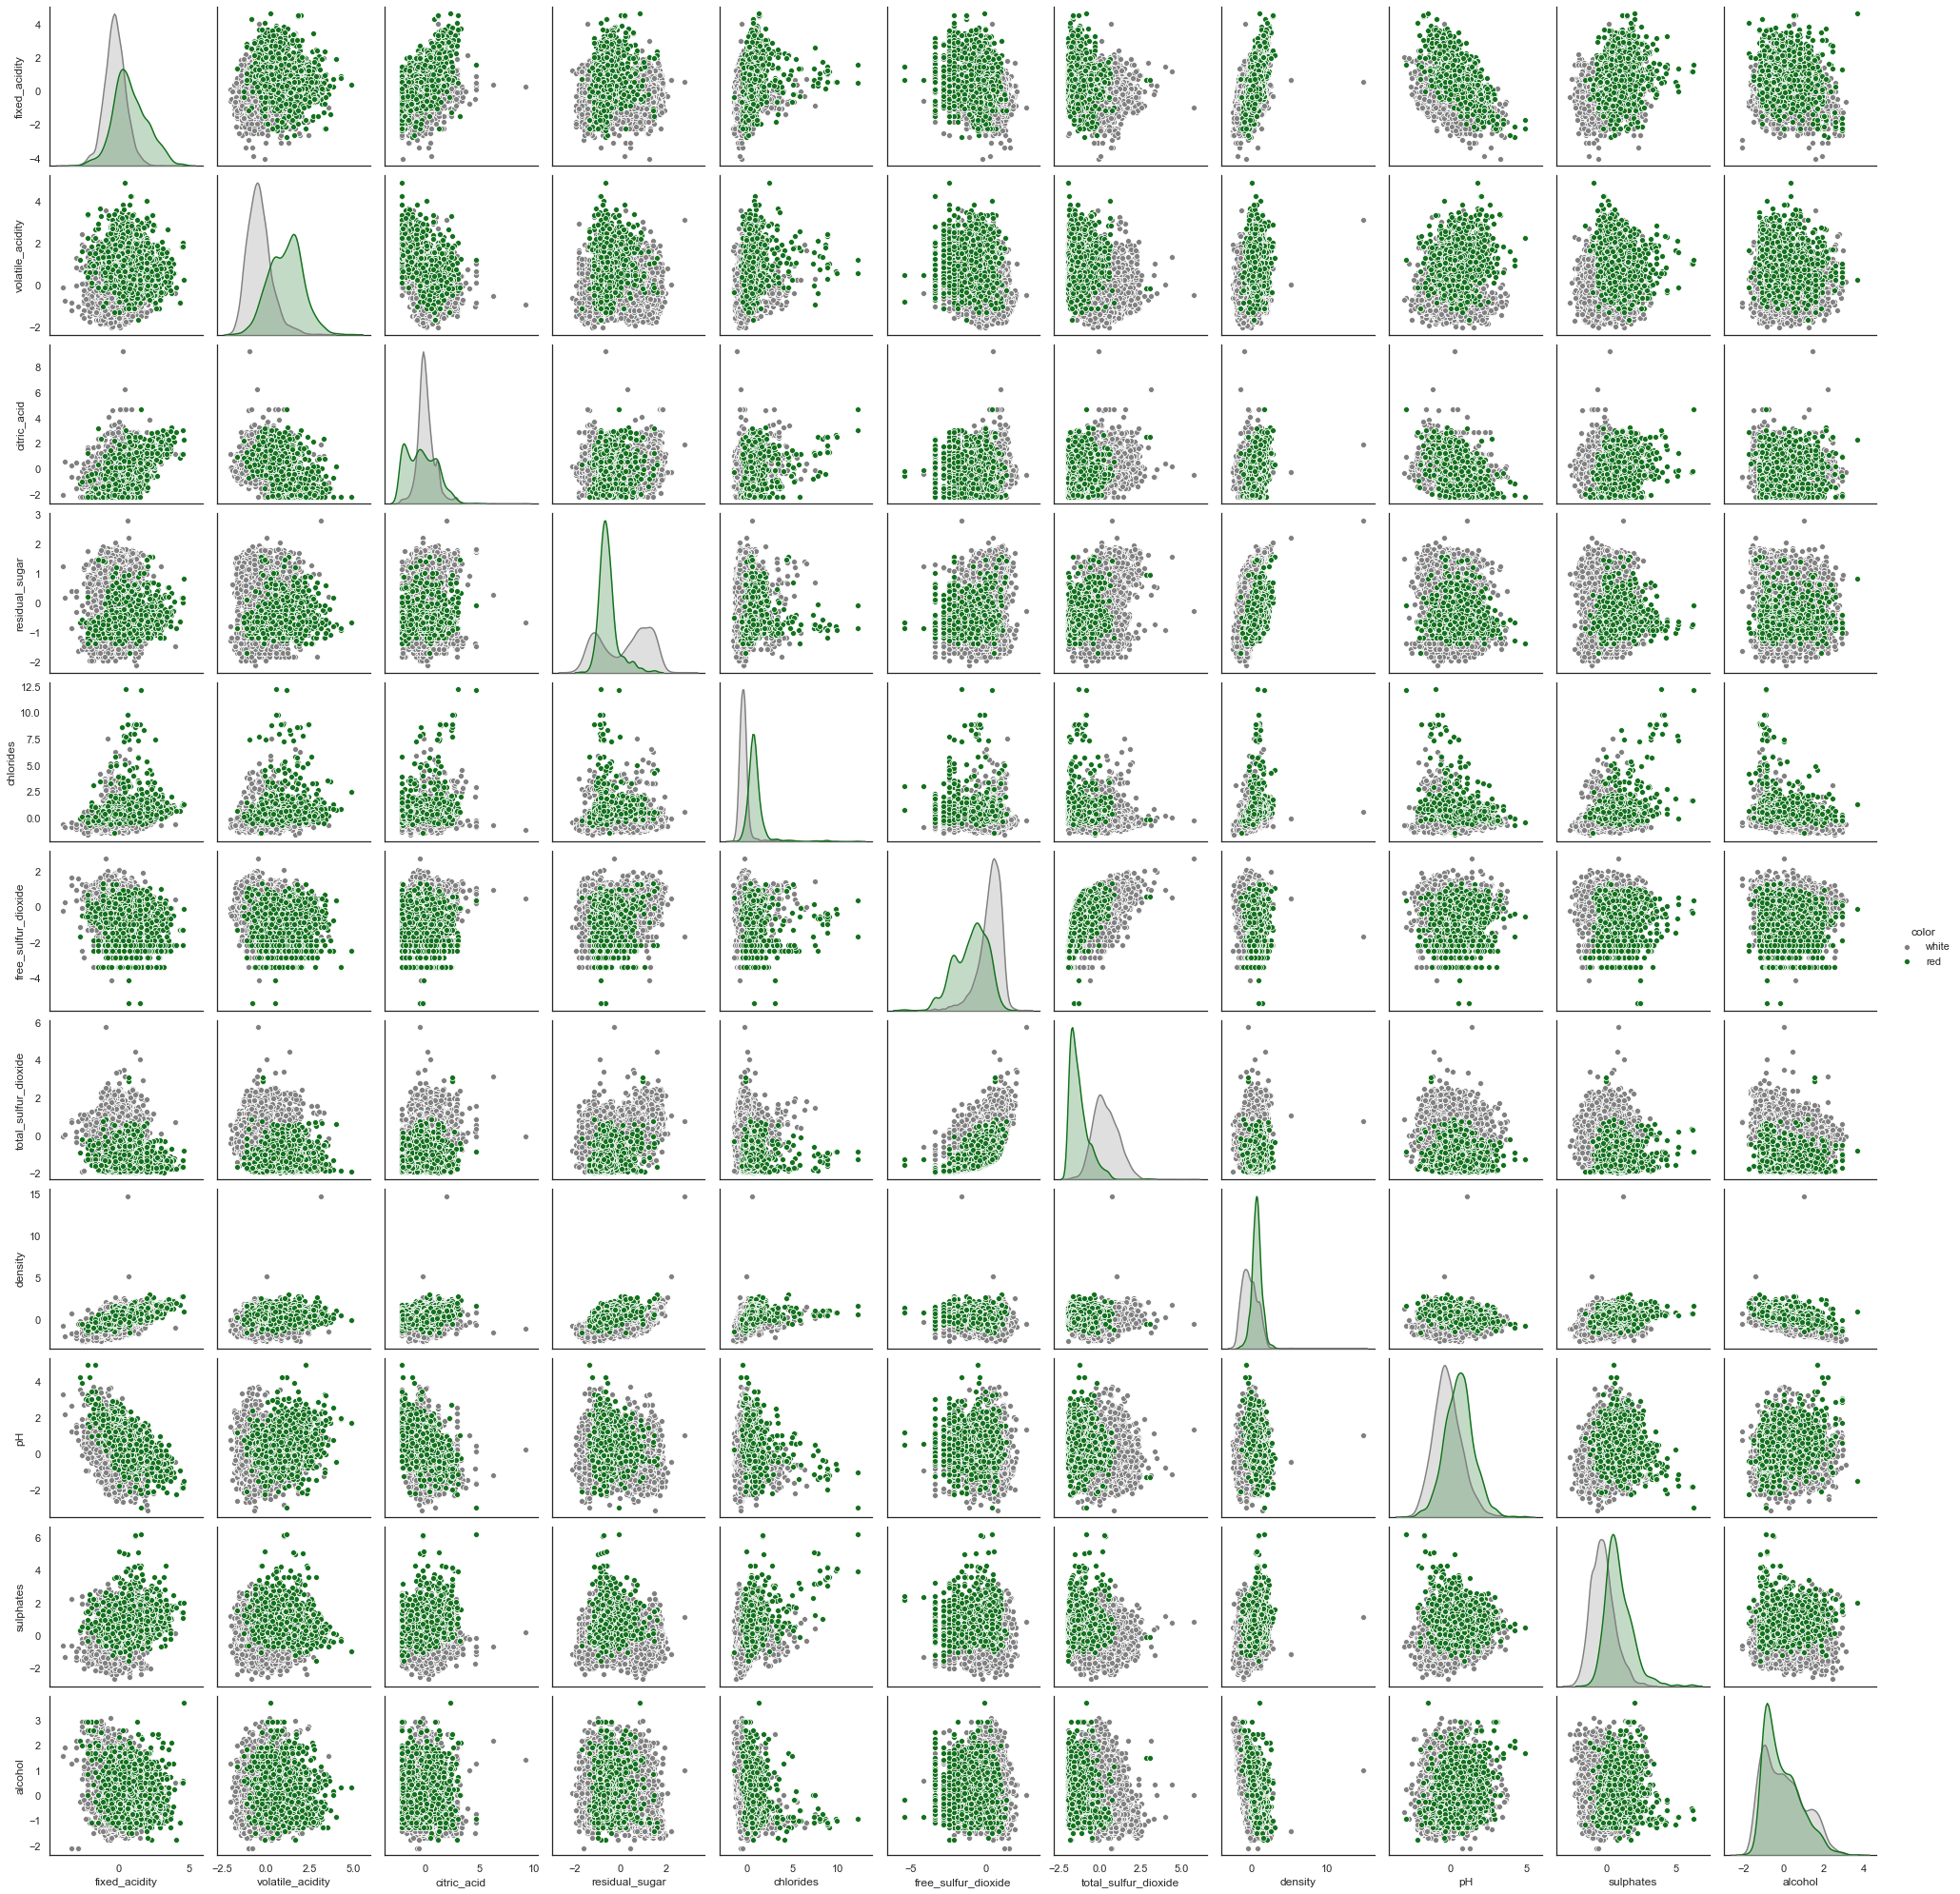

In [85]:
sns.set_context('notebook')
sns.pairplot(data[float_cols + ['color']],
             hue='color',
             hue_order=['white', 'red'],
             palette={'red':red, 'white': 'gray'})

## Question 3

* Fit a K-means clustering model with two clusters.
* Examine the clusters by wine color.

In [86]:
from sklearn.cluster import KMeans

#from sklearn.cluster import cluster
km = KMeans(n_clusters=2, random_state=42)
km = km.fit(data[float_cols])

data['kmeans'] = km.predict(data[float_cols])

In [93]:
(data[['color', 'kmeans']]
 .groupby(['color', 'kmeans'])
 .size()
 .to_frame()
 .rename(columns={0:'num'}))

                            

num
color kmeans      
red   0       1576
      1         23
white 0         91
      1       4807

## Question 4

* Now fit K-Means models with cluster values ranging from 1 to 20.
* For each model, store the number of clusters and the inertia value. 
* Plot cluster number vs inertia. Does there appear to be an ideal cluster number?

In [97]:
# Create and fit a range of models
km_list = list()

for clust in range(1, 21):
    km = KMeans(n_clusters=clust, random_state=42)
    km.fit(data[float_cols])
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_, 
                              'model': km}))
                   



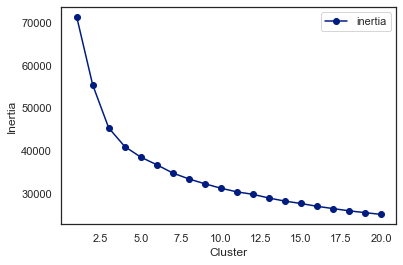

In [108]:
plot_data = (pd.concat(km_list, axis=1)
             .T[['clusters', 'inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o', ls='-')
ax.set(xlabel='Cluster', ylabel='Inertia');

## Question 5

* Fit an agglomerative clustering model with two clusters.
* Compare the results to those obtained by K-means with regards to wine color.
* Visualize the dendrogram produced by agglomerative clustering. *Hint:* SciPy has a module called [`cluster.hierarchy`](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy) that contains the `linkage` and `dendrogram` functions required to create the linkage map and plot the resulting dendrogram.

In [111]:
from sklearn.cluster import AgglomerativeClustering

agc = AgglomerativeClustering(n_clusters=2)
agc.fit(data[float_cols])

data['agglom'] = agc.fit_predict(data[float_cols])


Note that cluster assignment is arbitrary, the respective primary cluster numbers for red and white may not be identical to the ones below and also may not be the same for both K-means and agglomerative clustering.

In [119]:
(data[['color', 'agglom', 'kmeans']]
 .groupby(['color', 'agglom', 'kmeans'])
 .size().to_frame().rename(columns = {0:'num'}))


num
color agglom kmeans      
red   0      0         20
             1         17
      1      0       1556
             1          6
white 0      0         66
             1       4770
      1      0         25
             1         37

Though the cluster numbers are not necessarily identical, the clusters are very consistent within a single wine variety (red or white).

And here is a plot of the dendrogram created from agglomerative clustering.

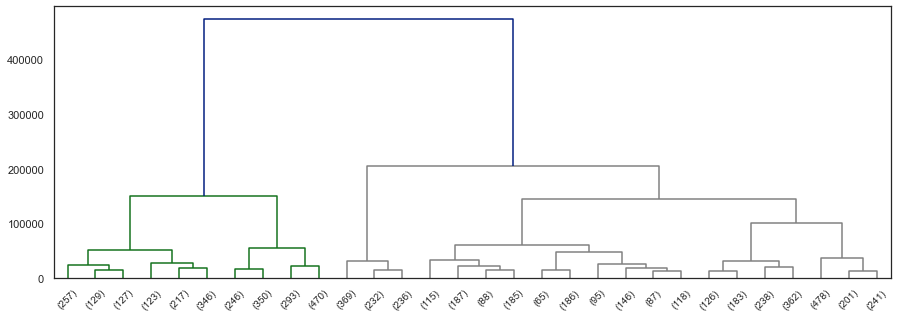

In [123]:
from scipy.cluster import hierarchy
from matplotlib import colors

cl = hierarchy.linkage(agc.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

dark_palette = sns.color_palette()
red = colors.to_hex(dark_palette[2])
blue = colors.to_hex(dark_palette[0])

hierarchy.set_link_color_palette([red, 'gray'])

den = hierarchy.dendrogram(cl, orientation='top', 
                          p=30, truncate_mode='lastp', 
                          show_leaf_counts=True, ax=ax, 
                          above_threshold_color=blue)

## Question 6

In this question, we are going to explore clustering as a form of feature engineering.

* Create a **binary** target variable `y`, denoting if the quality is greater than 7 or not.
* Create a variable called `X_with_kmeans` from `data`, by dropping the columns "quality", "color" and "agglom" from the dataset. Create `X_without_kmeans` from that by dropping "kmeans".
* For both datasets, using `StratifiedShuffleSplit` with 10 splits, fit 10 Random Forest Classifiers and average out the roc-auc scores.
* Compare the average roc-auc scores for the models using the kmeans clusters as a feature and the one that doesn't use it.

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit

y = (data['quality'] > 7).astype(int)
X_with_kmeans = data.drop(['quality', 'color', 'agglom'], axis=1)
X_without_kmeans = X_with_kmeans.drop(['kmeans'], axis=1)

sss = StratifiedShuffleSplit(n_splits=10, random_state=42)
# return classification_report(y_test, y_predicted)
def get_avg_roc(estimator, X, y):
    roc_auc_list = []
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        estimator.fit(X_train, y_train)
        y_predicted = estimator.predict(X_test)
        y_scored = estimator.predict_proba(X_test)[:, 1]
        roc_auc_list.append(roc_auc_score(y_test, y_scored))
    return np.mean(roc_auc_list)

rfc = RandomForestClassifier()
roc_with_kmeans = get_avg_roc(rfc, X_with_kmeans, y)
roc_without_kmeans = get_avg_roc(rfc, X_without_kmeans, y)
print("Without kmeans cluster as input to Random Forest, roc-auc is \"{0}\"".format(roc_without_kmeans))
print("Using kmeans cluster as input to Random Forest, roc-auc is \"{0}\"".format(roc_with_kmeans))

Without kmeans cluster as input to Random Forest, roc-auc is "0.9068650793650793"
Using kmeans cluster as input to Random Forest, roc-auc is "0.9105357142857142"


Let's now explore if the number of clusters have an effect in this improvement.

* Create the basis training set from `data` by restricting to float_columns.
* For $n = 1, \ldots, 20$, fit a kmeans algotihm with n clusters. One hot encode it and add it to the **basis** training set. Don't add it to the previous iteration.
* Fit 10 **Logistic Regression** models and compute the average roc-auc-score.
* Plot the average roc-auc scores.

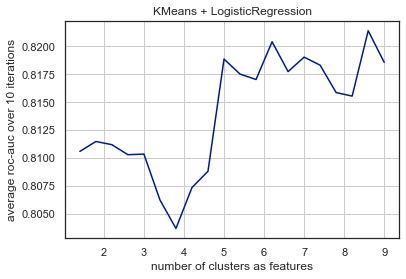

In [171]:
from sklearn.linear_model import LogisticRegression

X_basis = data[float_cols]
sss = StratifiedShuffleSplit(n_splits=10, random_state=123)


def create_kmeans_columns(n):
    km = KMeans(n_clusters=n)
    km.fit(X_basis)
    km_col = pd.Series(km.predict(X_basis))
    km_cols = pd.get_dummies(km_col, prefix='kmeans_cluster')
    return pd.concat([X_basis, km_cols], axis=1)
    
estimator = LogisticRegression()
ns = range(1, 21)
roc_auc_list = [get_avg_roc(estimator, create_kmeans_columns(n), y) for n in ns]


# seaborn styles
sns.set_context('notebook')
sns.set_style('white')
sns.set_palette('dark')

ax = plt.axes()
ax.plot(ns, roc_auc_list)
ax.set(
    xticklabels= ns,
    xlabel='number of clusters as features',
    ylabel='average roc-auc over 10 iterations',
    title='KMeans + LogisticRegression'
)
ax.grid(True)

## Question 7

Let's now explore on DBSCAN clustering method and if the number of samples have an effect in this improvement.

* Create the basis training set from `data` by restricting to float_columns.
* For $n = 1, \ldots, 20$, fit a kmeans algotihm with n clusters. One hot encode it and add it to the **basis** training set. Don't add it to the previous iteration.
* Fit 10 **Logistic Regression** models and compute the average roc-auc-score.
* Plot the average roc-auc scores.

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import DBSCAN

#Create a basis training set
X_basis_db = data[float_cols]

#Number of samples
samples = range(1, 21)

def create_dbscan_columns(n):
    db = DBSCAN(min_samples=n)
    db.fit(X_basis_db)
    db_col = pd.Series(db.fit_predict(X_basis_db))
    db_cols = pd.get_dummies(db_col, prefix='db_cluster')
    return pd.concat([X_basis_db, db_cols], axis=1)


estimator_db = LogisticRegression()
roc_auc_list_db = [get_avg_roc(estimator_db, create_dbscan_columns(sample), y) for sample in samples]

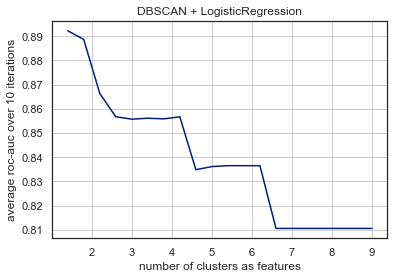

In [177]:
# seaborn styles
sns.set_context('notebook')
sns.set_style('white')
sns.set_palette('dark')

ax = plt.axes()
ax.plot(ns, roc_auc_list_db)
ax.set(
    xticklabels= ns,
    xlabel='number of clusters as features',
    ylabel='average roc-auc over 10 iterations',
    title='DBSCAN + LogisticRegression'
)
ax.grid(True)

## Question 8

Let's now explore on Birch clustering method and if the number of clusters have an effect in this improvement.

* Create the basis training set from `data` by restricting to float_columns.
* For $n = 1, \ldots, 20$, fit a kmeans algotihm with n clusters. One hot encode it and add it to the **basis** training set. Don't add it to the previous iteration.
* Fit 10 **Logistic Regression** models and compute the average roc-auc-score.
* Plot the average roc-auc scores.

In [180]:
from sklearn.cluster import Birch

#Create a basis training set
X_basis_brc = data[float_cols]

In [181]:
def create_birch_columns(n):
    brc = Birch(n_clusters=n)
    brc.fit(X_basis_br)
    brc_col = pd.Series(brc.predict(X_basis_brc))
    brc_cols = pd.get_dummies(brc_col, prefix='brc_cluster')
    return pd.concat([X_basis_brc, brc_cols], axis=1)

In [184]:
estimator_brc = LogisticRegression()
roc_auc_list_brc = [get_avg_roc(estimator_brc, create_birch_columns(n), y) for n in ns]

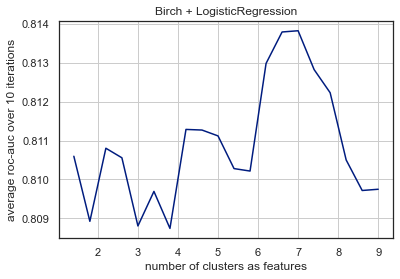

In [183]:
# seaborn styles
sns.set_context('notebook')
sns.set_style('white')
sns.set_palette('dark')

ax = plt.axes()
ax.plot(ns, roc_auc_list_brc)
ax.set(
    xticklabels= ns,
    xlabel='number of clusters as features',
    ylabel='average roc-auc over 10 iterations',
    title='Birch + LogisticRegression'
)
ax.grid(True)